## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json 
import sklearn

C:\Users\PHU\AppData\Local\Temp\ipykernel_18308\131012052.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Exploratory Data Analysis

* Load Datasets
* Get size of each dataset
* Check the duplicate data in each dataset
* Meaning of each column

### Load Datasets

In [2]:
#load data
reviews_df = pd.read_csv('data/cleaned_reviews_v2.csv')
steamdb_df = pd.read_csv('data/cleaned_steam_db_v2.csv')
overview_df = pd.read_csv('data/cleanded_bridge.csv')

In [3]:
#read genre_dict.json into a dictionary
with open('data/genre_dict_clean.json') as json_file:
    genre_dict = json.load(json_file)

In [4]:
print(genre_dict)

{'1': 'Action', '2': 'Strategy', '3': 'RPG', '4': 'Casual', '9': 'Racing', '18': 'Sports', '23': 'Indie', '25': 'Adventure', '28': 'Simulation', '29': 'Massively Multiplayer', '37': 'Free to Play', '50': 'Accounting', '51': 'Animation & Modeling', '52': 'Audio Production', '53': 'Design & Illustration', '54': 'Education', '55': 'Photo Editing', '56': 'Software Training', '57': 'Utilities', '58': 'Video Production', '59': 'Web Publishing', '60': 'Game Development', '70': 'Early Access', '71': 'Sexual Content', '72': 'Nudity', '73': 'Violent', '74': 'Gore', '80': 'Movie', '81': 'Documentary', '82': 'Episodic', '83': 'Short', '84': 'Tutorial'}


In [5]:
#temporarily exclude id from 50 to 60 and 80 to 84 because they are app and video 
genre_dict = {k: v for k, v in genre_dict.items() if k not in ['50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '80', '81', '82', '83', '84']}
print(genre_dict)

{'1': 'Action', '2': 'Strategy', '3': 'RPG', '4': 'Casual', '9': 'Racing', '18': 'Sports', '23': 'Indie', '25': 'Adventure', '28': 'Simulation', '29': 'Massively Multiplayer', '37': 'Free to Play', '60': 'Game Development', '70': 'Early Access', '71': 'Sexual Content', '72': 'Nudity', '73': 'Violent', '74': 'Gore'}


In [6]:
steamdb_df["genres"] = steamdb_df["genres"].apply(lambda x: json.loads(x))
# for each number in genres column, replace with the corresponding genre in the genre_df
steamdb_df['genres'] = steamdb_df['genres'].apply(lambda x: [genre_dict[str(i)] if str(i) in genre_dict else None for i in x])

In [7]:
reviews_df.head()

,recommendationid,review,timestamp_created,timestamp_updated,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access,appid,steamid,num_games_owned,num_reviews,playtime_forever,playtime_last_two_weeks,playtime_at_review,last_played
0,55936147,A fun and quirky stealth-based problem solving...,2019-10-31 02:33:41,2019-10-31 02:33:41,True,2,0,0.554140,0,True,False,False,1018080,76561198051821837,0,12,41,0,41.0,2019-10-31 00:52:26
1,55989797,"Loved the art style, and the game ran very smo...",2019-10-31 11:57:40,2019-10-31 11:57:40,True,1,0,0.523810,0,True,False,False,1018080,76561197993790846,657,8,17,0,15.0,2019-11-03 09:37:50
2,64251252,the game crashed four times for one hour.... i...,2020-02-28 16:21:55,2020-02-28 16:26:49,False,0,0,0.000000,0,True,False,False,1018080,76561198095855343,1254,24,76,0,76.0,2020-02-28 16:16:07
3,49140086,While I cannot recommend this Unity asset reli...,2019-02-21 15:52:16,2019-02-21 15:52:16,False,16,0,0.624971,0,True,False,False,1018090,76561198053422627,2384,1225,56,0,56.0,2019-02-23 20:59:13
4,49137406,Is extremely unoptimized and has laggy framera...,2019-02-21 13:10:21,2019-02-21 13:10:21,False,11,0,0.527824,0,True,False,False,1018090,76561198019816374,1351,1674,10,0,10.0,2019-02-21 11:27:35


In [8]:
steamdb_df.head()

,type,name,steam_appid,required_age,is_free,genres,platform_windows,platform_mac,platform_linux,release_year,...,lang_ru,lang_ar,tool,nsfw,film,release_distance_value,initial_price_usd,final_price_usd,memory_gb,storage_gb
0,demo,Pin Them Demo,1904630,0,True,[],True,False,False,2023.0,...,False,False,False,False,False,2,0.000,0.000,NaN,NaN
1,game,Al-Qadim: The Genie's Curse,1904640,0,False,"[Action, RPG]",True,False,False,2022.0,...,False,False,False,False,False,2,3.204,3.204,0.5,2.0
2,game,Dungeons & Dragons - Stronghold: Kingdom Simul...,1904650,0,False,"[Simulation, Strategy]",True,False,False,2022.0,...,False,False,False,False,False,2,3.204,3.204,0.5,2.0
3,game,Chapel 3-D: The Ascent,1904680,0,False,"[Action, Indie]",True,False,False,NaN,...,False,False,False,False,False,0,0.000,0.000,1.0,0.0
4,game,VTuber Gallery : Anime Pose,1904690,0,True,"[None, None, None, None, None, Early Access]",True,False,False,2022.0,...,False,False,True,False,False,2,0.000,0.000,8.0,0.0


In [9]:
overview_df.head()

,Unnamed: 0,appid,num_reviews,review_score,review_score_desc,total_positive,total_negative,total_reviews
0,0,1020470,2,6,Mostly Positive,360,106,466
1,1,1018050,0,0,No user reviews,0,0,0
2,2,1018060,0,0,No user reviews,0,0,0
3,3,1018080,3,0,3 user reviews,2,1,3
4,4,1018090,7,0,7 user reviews,1,6,7


### Get size of each dataset

In [10]:
print(f'Steam Database Size: {steamdb_df.shape}')
print(f'Reviews Database Size: {reviews_df.shape}')
print(f'Overview Database Size: {overview_df.shape}')

Steam Database Size: (95033, 39)
Reviews Database Size: (299341, 20)
Overview Database Size: (94026, 8)


### Check the duplicate data in each dataset

In [11]:
temp_steamdb = steamdb_df.drop(columns=['genres'])
is_steamdb_duplicated = temp_steamdb.duplicated().sum()
is_reviews_duplicated = reviews_df.duplicated().sum()
is_overview_duplicated = overview_df.duplicated().sum()

In [12]:
print(f'Steam Database Duplicates: {is_steamdb_duplicated}')
print(f'Reviews Database Duplicates: {is_reviews_duplicated}')
print(f'Overview Database Duplicates: {is_overview_duplicated}')

Steam Database Duplicates: 0
Reviews Database Duplicates: 0
Overview Database Duplicates: 0


### Meaning of each column

**_1. Steam Database's columns information_**

|                                                       Attribute                                                       | Value type |                                                                                          Description                                                                                          |
|:---------------------------------------------------------------------------------------------------------------------:|:----------:|:---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------:|
| type                                                                                                                  | string     | Type of the app / software.<br>‘demo’, ‘game’, ‘dlc’, ‘hardware’, etc.                                                                                                                        |
| name                                                                                                                  | string     | App name                                                                                                                                                                                      |
| steam_appid                                                                                                           | int        | App ID                                                                                                                                                                                        |
| required_age                                                                                                          | int        | Required age to play video games. Mostly 0 (i.e., anyone can play)                                                                                                                            |
| is_free                                                                                                               | bool       | If true, the app is free                                                                                                                                                                      |
|   genres                                                                                                            | list       | list of genres of the game                                                                                                                                                                      |
| platform_windows                                                                                                      | bool       | If true, the app supports Windows                                                                                                                                                             |
| platform_mac                                                                                                          | bool       | If true, the app supports MacOS                                                                                                                                                               |
| platform_linux                                                                                                        | bool       | If true, the app supports Linux                                                                                                                                                               |
| storage_mb                                                                                                            | int        | The minimum required storage of the app                                                                                                                                                       |
| memory_mb                                                                                                             | int        | The minimum required memory/RAM to use the app                                                                                                                                                |
| coming_date                                                                                                           | date       | The release date of the app                                                                                                                                                                   |
| coming_soon                                                                                                           | bool       | If true, the app has not been released yet                                                                                                                                                    |
| package_number                                                                                                        | int        | The number of packages of the app                                                                                                                                                             |
| currency                                                                                                              | string     | The currency of of the app                                                                                                                                                                    |
| initial_price                                                                                                         | int        | The initial price of the app                                                                                                                                                                  |
| final_price                                                                                                           | int        | The final price of the app                                                                                                                                                                    |
| discount_percent                                                                                                      | int        | The discount of the app’s price                                                                                                                                                               |
| fullgame_appid                                                                                                        | int        | The complete full game ID                                                                                                                                                                     |
| demo_appid                                                                                                            | int        | The demo game ID                                                                                                                                                                              |
| developers_amount                                                                                                     | int        | The number of developers                                                                                                                                                                      |
| publishers_amount                                                                                                     | int        | The number of publishers                                                                                                                                                                      |
| single                                                                                                                | bool       | If true, the app (mostly game) has single-player mode                                                                                                                                         |
| multi                                                                                                                 | bool       | If true, the app (mostly game) has multi-player mode. A single game can be both single-player and multi-player modes                                                                          |
| support_vr                                                                                                            | bool       | If true, the app supports VR                                                                                                                                                                  |
| support_controller                                                                                                    | bool       | If true, the app supports controller                                                                                                                                                          |
| lang_en<br>lang_fr<br>lang_de<br>lang_es<br>lang_po<br>lang_zh<br>lang_ja<br>lang_ko<br>lang_it<br>lang_ru<br>lang_ar | bool       | If true, the app supports certain languages. This includes English, French, German, Spanish, Portuguese, Chinese (Simplified and Traditional), Japanese, Korean, Italian, Russian and Arabic. |
| tool                                                                                                                  | bool       | If true, the app is tool                                                                                                                                                                      |
| nsfw                                                                                                                  | bool       | If true, the app is not safe for work (gore, nudity, and sexual content)                                                                                                                      |

**_2. Reviews' columns information_**

| Column Name | Meaning                                                              |
| :---------- | :------------------------------------------------------------------- |
| recommendationid     |  The unique id of the recommendation                                               |
| review   | text of written review                                                |
| timestamp_created      | date the review was created (unix timestamp)                              |
| timestamp_updated    | date the review was last updated (unix timestamp)                                                 |
| voted_up       | true means it was a positive recommendation                               |
| votes_up       | the number of users that found this review helpful                                 |
| votes_funny     | the number of users that found this review funny                              |
| weighted_vote_score    | helpfulness score                             |
| comment_count  | number of comments posted on this review |
| steam_purchase  | true if the user purchased the game on Steam                                            |
| received_for_free  | true if the user checked a box saying they got the app for free                                            |
| written_during_early_access  | true if the user posted this review while the game was in Early Access                                            |
| appid | App ID of the reviewed app                                             |
| steamid  | the user’s SteamID                                            |
| num_games_owned  | number of games owned by the user                                           |
| num_reviews  | number of reviews written by the user                                            |
| playtime_forever  | lifetime playtime tracked in this app                                            |
| playtime_last_two_weeks  | playtime tracked in the past two weeks for this app                                           |
| playtime_at_review  | playtime when the review was written                                            |
| last_played  | time for when the user last played                                           |

**_3. Overview's columns information_**

| Column Name  | Meaning                                                              |
| :----------  | :------------------------------------------------------------------- |
| appid   | ID of the app                                               |
| num_reviews   | The number of reviews of each app in this dataset                                             |
| review_score | The review score of game on a scale from 0 to 10                                             |
| review_score_desc  | The description of the review score                                              |
| total_positive        | Total number of positive reviews                              |
| total_negative      | Total number of negative reviews                          |
| total_reviews   | Total number of reviews of the app |

### Make questions

#### **1. Which factors should the game developers focus on in order to make their games get more positive reviews, these factors include: price, system requirements or genre?**

* Visualize the relationship between the price, system requirements, and genre of the game with the number of positive reviews
* Answer this question will help game developers to know what they should focus on to make their games more popular and get more positive reviews.
* To answer this question, we will analyze the relationship between the price, system requirements, and genre of the game with the number of positive reviews.

In [13]:
#merge the data
steamdb_df = steamdb_df.rename(columns={'steam_appid': 'appid'})
merged_df = pd.merge(reviews_df, steamdb_df, on='appid', how='inner')
merged_df = pd.merge(merged_df, overview_df, on='appid', how='inner')

##### Making some exploration 

Before going into visualization, I will make some exploration to understand the data better. <br/>
I will check the outliers in the price, system requirements, and genre of the game to see if there are any outliers that need to be removed.

c:\Users\PHU\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\PHU\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\PHU\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


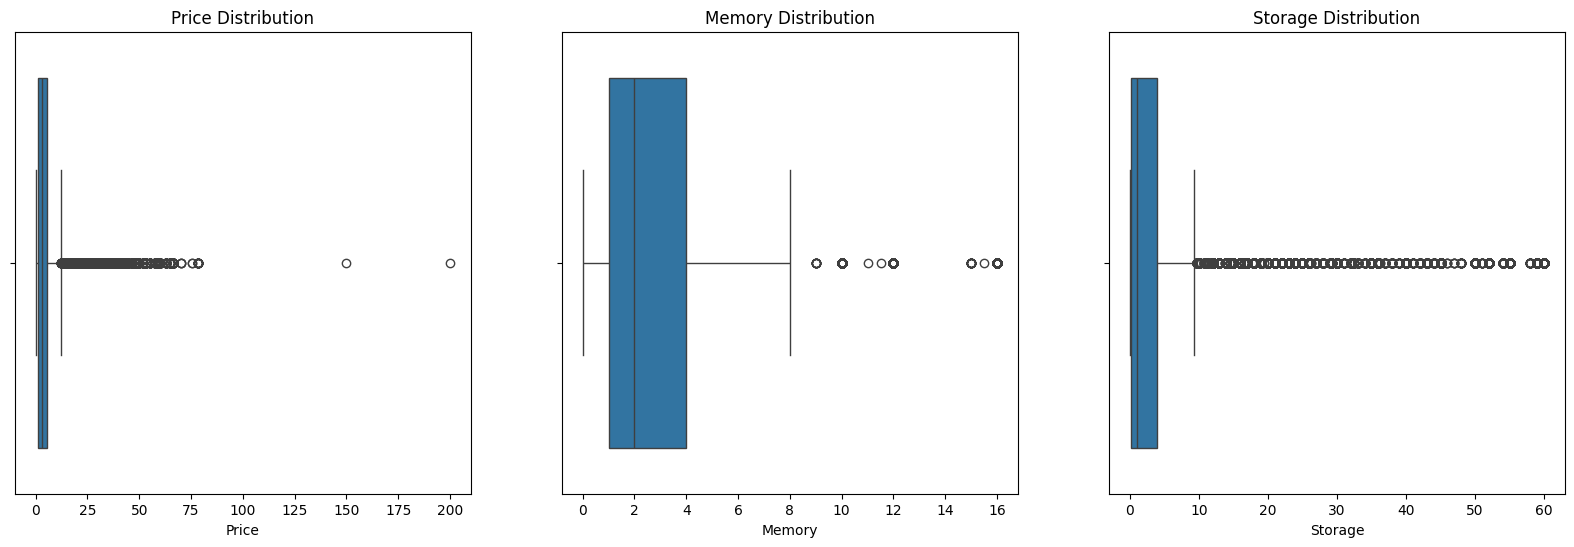

In [14]:
#visualize the price, memory, storage distribution using boxplot, use 3 subplots
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

sns.boxplot(x='final_price_usd', data=merged_df, ax=axs[0])
axs[0].set_title('Price Distribution')
axs[0].set_xlabel('Price')

sns.boxplot(x='memory_gb', data=merged_df, ax=axs[1])
axs[1].set_title('Memory Distribution')
axs[1].set_xlabel('Memory')

sns.boxplot(x='storage_gb', data=merged_df, ax=axs[2])
axs[2].set_title('Storage Distribution')
axs[2].set_xlabel('Storage')

plt.show()

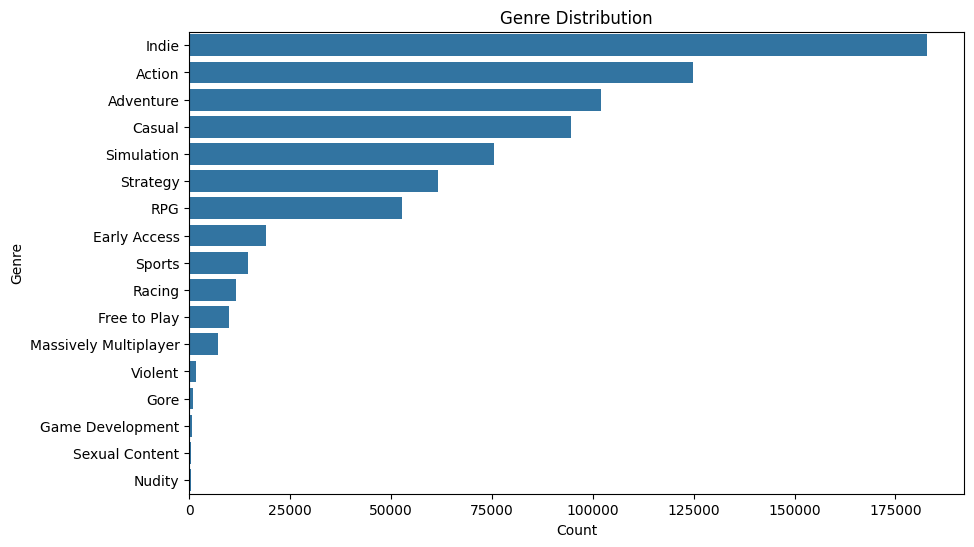

In [15]:
#visualize the genre distribution using a barplot
plt.figure(figsize=(10, 6))
genre_count = merged_df['genres'].explode().value_counts()
sns.barplot(x=genre_count.values, y=genre_count.index)
plt.title('Genre Distribution')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

As we can see in the plots: Only the price distribution has many outliers that need to be removed.

#### Outlier Removal in Dataset using IQR

In [16]:
#Outlier Removal in Dataset using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] > lower_bound) & (df[column] < upper_bound)]
    return df

In [17]:
#remove outliers price and storage 
merged_df = remove_outliers(merged_df, 'final_price_usd')

##### Visualize for Positive Review

In [18]:
# Calculate the average positive review ratio for each category
#price groups
price_groups = merged_df.groupby("final_price_usd")[["total_positive", "total_negative"]].sum().reset_index()
price_groups["positive_ratio"] = price_groups["total_positive"] / (price_groups["total_positive"] + price_groups["total_negative"])
#memory groups
memory_groups = merged_df.groupby("memory_gb")[["total_positive", "total_negative"]].sum().reset_index()
memory_groups["positive_ratio"] = memory_groups["total_positive"] / (memory_groups["total_positive"] + memory_groups["total_negative"])
#storage groups
storage_groups = merged_df.groupby("storage_gb")[["total_positive", "total_negative"]].sum().reset_index()
storage_groups["positive_ratio"] = storage_groups["total_positive"] / (storage_groups["total_positive"] + storage_groups["total_negative"])
#genre groups
genre_groups = merged_df.explode('genres').groupby('genres')[["total_positive", "total_negative"]].sum().reset_index()
genre_groups["positive_ratio"] = genre_groups["total_positive"] / (genre_groups["total_positive"] + genre_groups["total_negative"])
#sort the dataframe by positive_ratio
genre_groups = genre_groups.sort_values(by='positive_ratio', ascending=False).reset_index(drop=True)

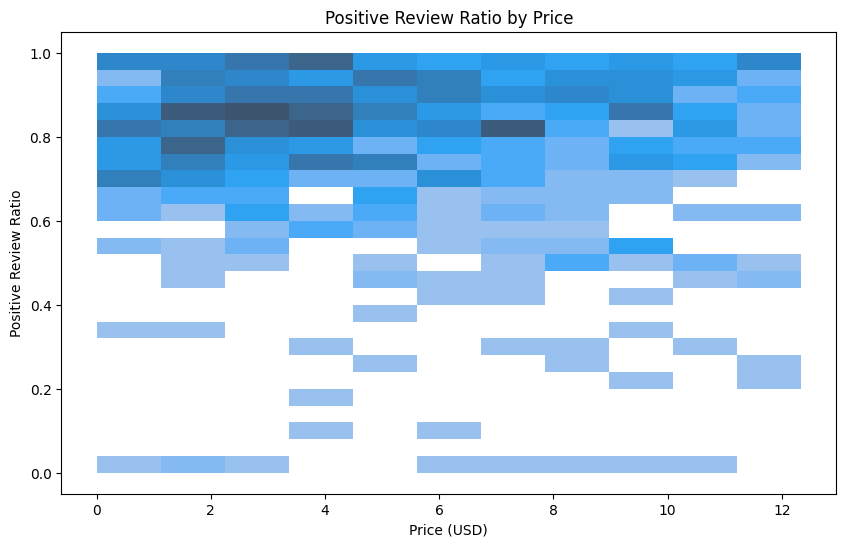

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(x="final_price_usd", y="positive_ratio", data=price_groups)
plt.title("Positive Review Ratio by Price")
plt.xlabel("Price (USD)")
plt.ylabel("Positive Review Ratio")
plt.show()

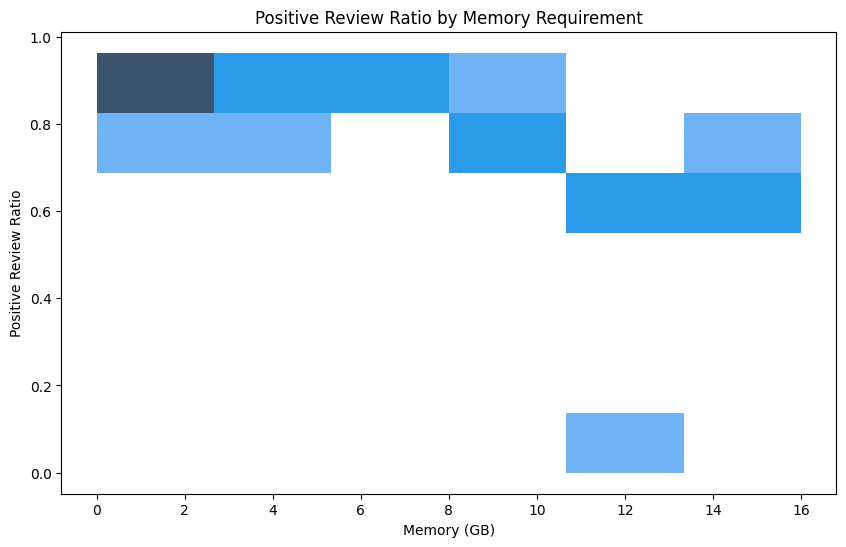

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(x="memory_gb", y="positive_ratio", data=memory_groups)
plt.title("Positive Review Ratio by Memory Requirement")
plt.xlabel("Memory (GB)")
plt.ylabel("Positive Review Ratio")
plt.show()

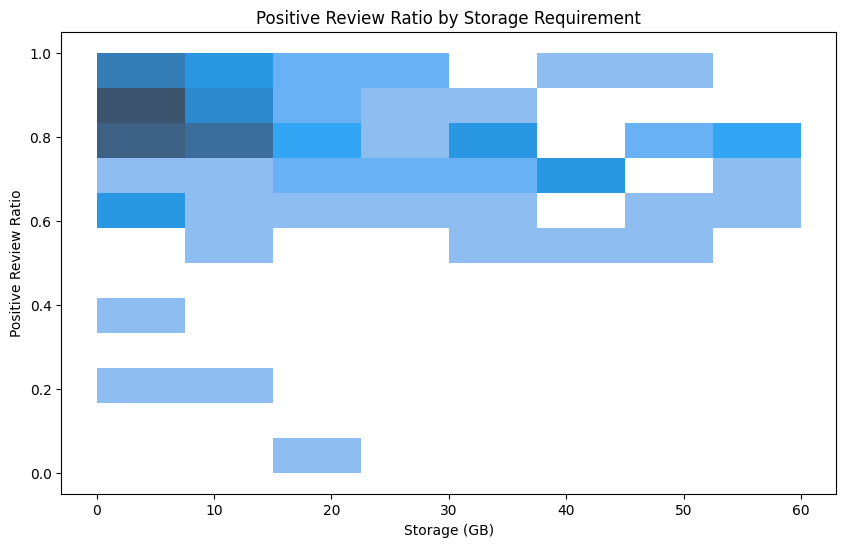

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(x="storage_gb", y="positive_ratio", data=storage_groups)
plt.title("Positive Review Ratio by Storage Requirement")
plt.xlabel("Storage (GB)")
plt.ylabel("Positive Review Ratio")
plt.show()

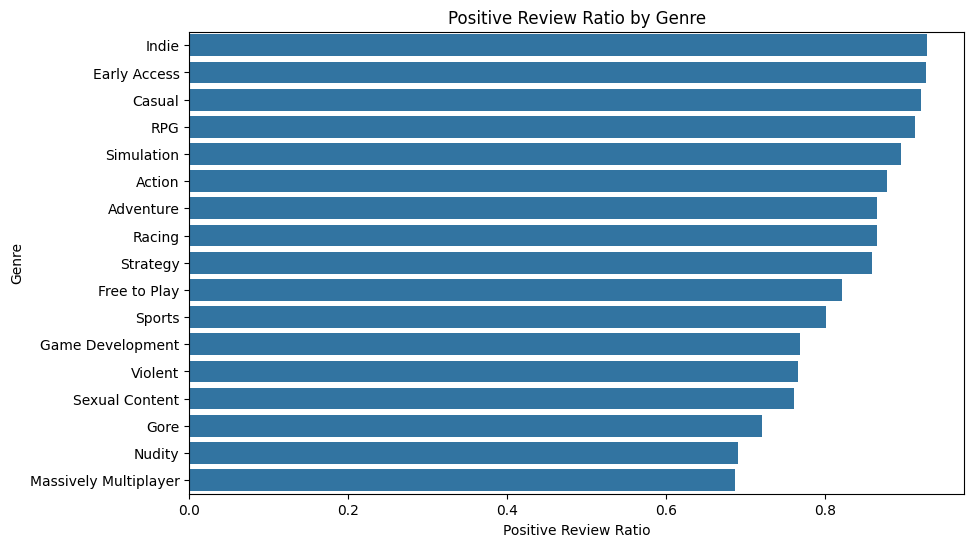

In [22]:
plt.figure(figsize=(10, 6))
#make the bar face upwards and set different colors for each genre
sns.barplot(x="positive_ratio", y="genres", data=genre_groups)
plt.title("Positive Review Ratio by Genre")
plt.xlabel("Positive Review Ratio")
plt.ylabel("Genre")
plt.show()

As we can see from these plot:
* The higher the price, the fewer the number of positive reviews, most positive reviews are from the games with the price from 0 to 10 dollars.
* The more memory and storage required, the fewer the number of positive reviews, most positive reviews are from the games with the memory required from 0 to 8 GB and the storage required from 0 to 40 GB.
* Many genres have a high number of positive reviews, such as Action, Adventure, Indie, RPG, Simulation, Strategy, etc. However, some genres have a low number of positive reviews, such as Sexual Content, Violent, Gore, Nudity, Massively Multiplayer. \
In conclusion, the game developers should focus on optimizing the system requirement with the memory required from 0 to 8 GB and the storage required from 0 to 40 GB, sell their games at the price from 0 to 10 dollars and the genres such as Action, Adventure, Indie, RPG, Simulation, Strategy, etc. to make their games more popular and get more positive reviews. 


#### **2. Which game genres are the most popular among Steam users?**

Steam has a variety of game genres, some genres are more popular than others. To answer this question, I will analyze the distribution of the number of reviews of each genre in the dataset. The genre with the highest number of reviews is the most popular genre among Steam users.\
Answering this question let the steam users know which game genres are the most popular among Steam users, so they can choose the game genres that they like.

In [23]:
genre_groups = merged_df.explode('genres').groupby('genres')["total_reviews"].sum().reset_index()
#sort the dataframe by Total Reviews
genre_groups = genre_groups.sort_values(by='total_reviews', ascending=False).reset_index(drop=True)

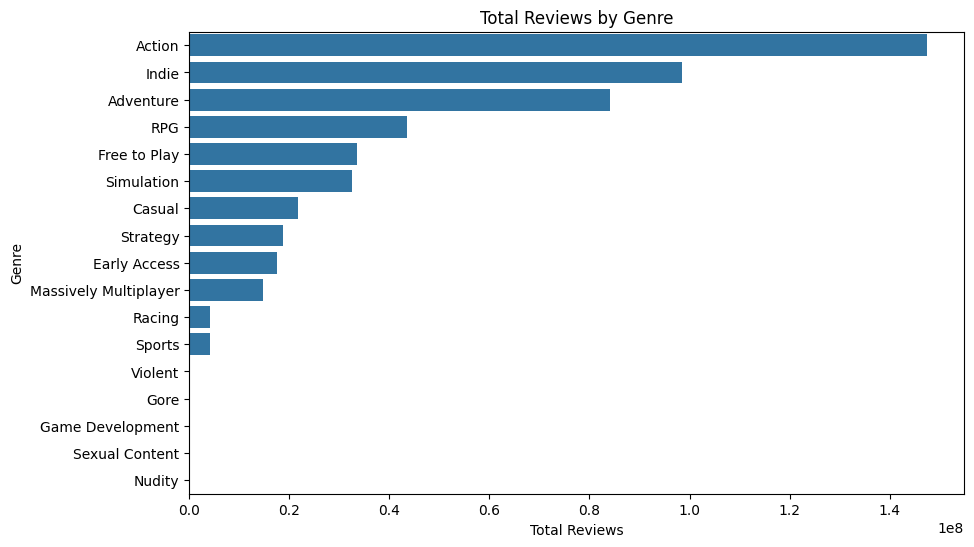

In [24]:
#visualize the data
plt.figure(figsize=(10, 6))
#the labels are too long, so we will rotate them in the bar plot
sns.barplot(x="total_reviews", y="genres", data=genre_groups)
plt.title("Total Reviews by Genre")
plt.xlabel("Total Reviews")
plt.ylabel("Genre")
plt.show()

As we can see from the plot, the most popular game genres among Steam users are Action, Adventure, Indie, RPG, Simulation, Strategy, Casual, etc.\
In conclusion, if a user wants to play the most popular game genres among Steam users, they should choose these genres.

#### **3. How does the sentiment expressed in review comments correlate with the games' review scores and playtime?**

Each steam user can write a review comment expressing their sentiment about the game. Answering this question will help us know if the users wrote good comments, will that game have a high review score and playtime.\
To answer this question, I will analyze the correlation between the sentiment expressed in review comments with quantitative metrics like review scores and playtime.

In [25]:
from textblob import TextBlob  # Sentiment analysis library

In [26]:
#create a sentiment_df to store the sentiment analysis results, with columns: appid, review
sentiment_df = reviews_df[['appid', 'review']]

In [27]:
sentiment_df['sentiment'] = sentiment_df['review'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

C:\Users\PHU\AppData\Local\Temp\ipykernel_18308\425035885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiment_df['sentiment'] = sentiment_df['review'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)


In [28]:
#add review_score column in the overview_df and playtime_forever column in the reviews_df to the sentiment_df
sentiment_df = pd.merge(sentiment_df, overview_df[['appid', 'review_score']], on='appid', how='inner')
sentiment_df = pd.merge(sentiment_df, reviews_df[['appid', 'playtime_forever']], on='appid', how='inner')

##### Make some exploration

c:\Users\PHU\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\PHU\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\PHU\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


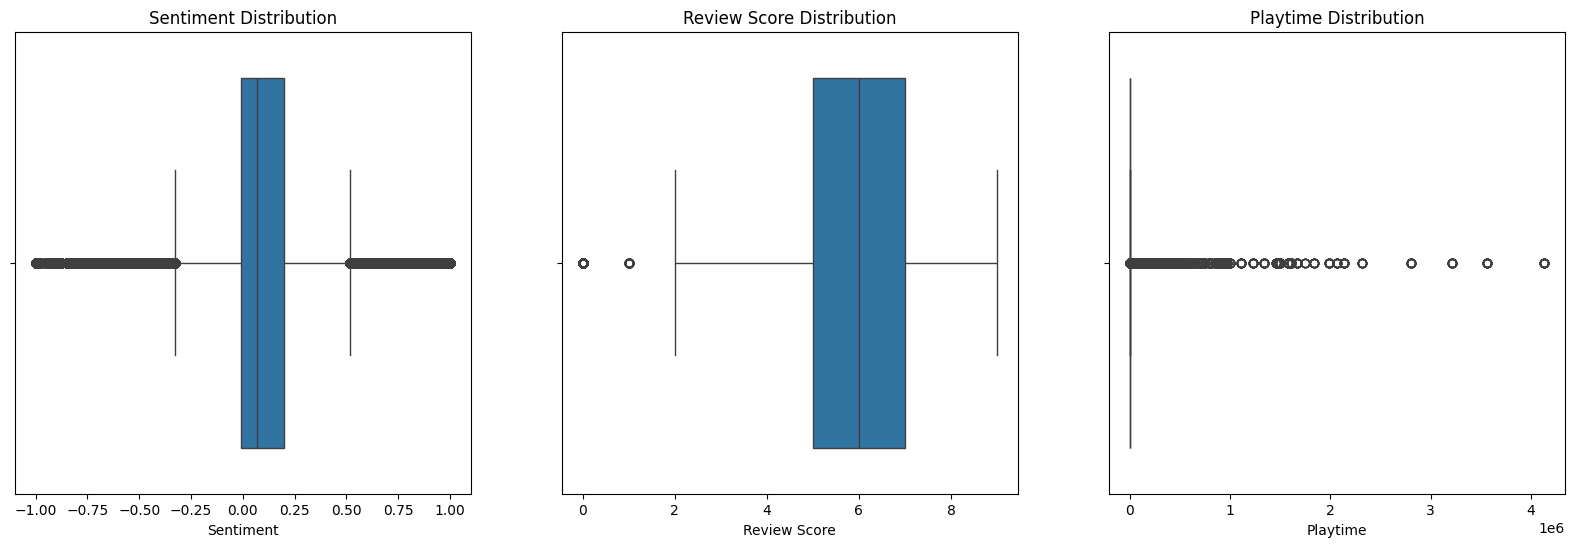

In [29]:
#visualize the sentiment, review score, and playtime distribution using a boxplot, use 3 subplots
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

sns.boxplot(x='sentiment', data=sentiment_df, ax=axs[0])
axs[0].set_title('Sentiment Distribution')
axs[0].set_xlabel('Sentiment')

sns.boxplot(x='review_score', data=sentiment_df, ax=axs[1])
axs[1].set_title('Review Score Distribution')
axs[1].set_xlabel('Review Score')

sns.boxplot(x='playtime_forever', data=sentiment_df, ax=axs[2])
axs[2].set_title('Playtime Distribution')
axs[2].set_xlabel('Playtime')

plt.show()

As we can see from the boxplot, there are some outliers in the playtime that need to be removed.

In [30]:
#remove outliers in playtime
sentiment_df = remove_outliers(sentiment_df, 'playtime_forever')

In [31]:
#drop row with sentiment = 0 and review_score = 0
sentiment_df = sentiment_df[sentiment_df['review_score'] != 0]

In [32]:
# calculate the average sentiment of each appid and use histplot to compare it with review_score
average_sentiment = sentiment_df.groupby('appid')['sentiment'].mean().reset_index()
review_sent = pd.merge(average_sentiment, overview_df[['appid', 'review_score']], on='appid', how='inner')

In [33]:
#calculate the average playtime of each appid
average_playtime = sentiment_df.groupby('appid')['playtime_forever'].mean().reset_index()
review_playtime = pd.merge(review_sent, average_playtime, on='appid', how='inner')

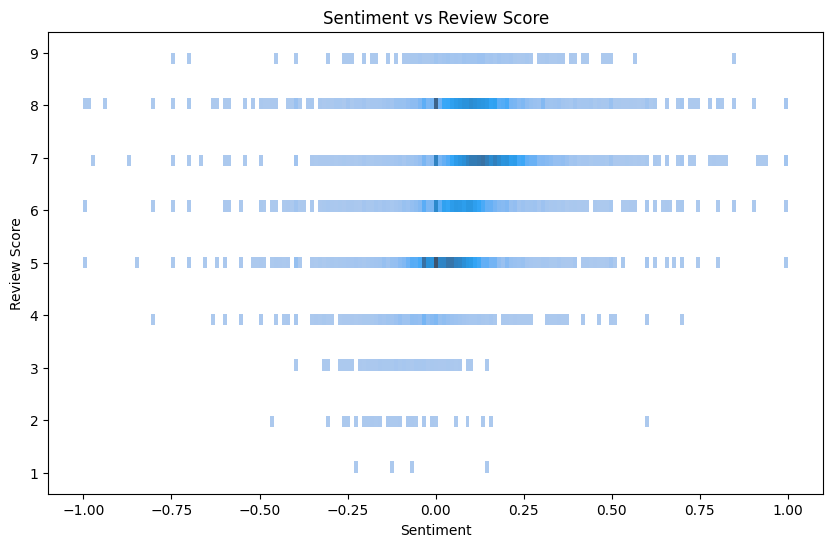

In [34]:
#visualize the data 
plt.figure(figsize=(10, 6))
sns.histplot(x='sentiment', y='review_score', data=review_sent)
plt.title('Sentiment vs Review Score')
plt.xlabel('Sentiment')
plt.ylabel('Review Score')
plt.show()

As we can see from the plots, the games with positive review comments have higher review scores.

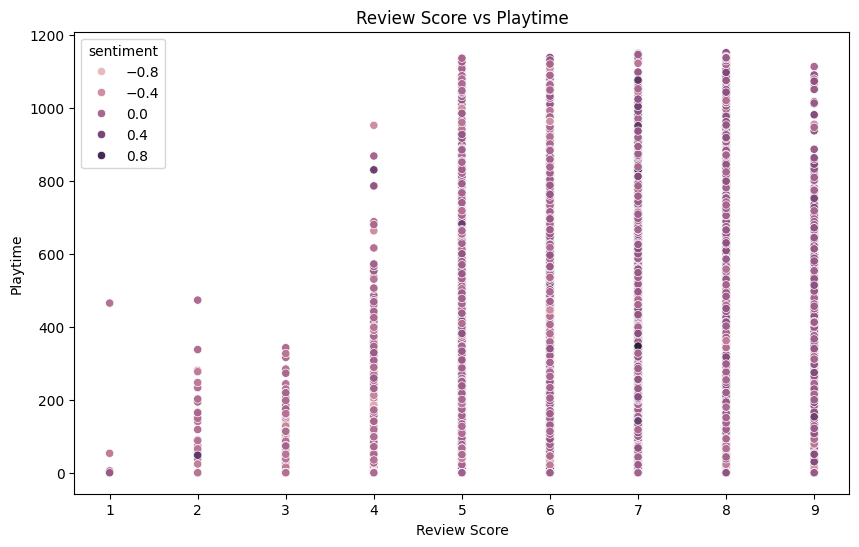

In [36]:
#visualize the data
plt.figure(figsize=(10, 6))
sns.scatterplot(x='review_score', y='playtime_forever', data=review_playtime, hue='sentiment')
plt.title('Review Score vs Playtime')
plt.xlabel('Review Score')
plt.ylabel('Playtime')
plt.show()

This plot shows that the games with positive review comments have higher playtime. \
In conclusion, the sentiment expressed in review comments correlates positively with the games' review scores and playtime. The games with positive review comments have higher review scores and playtime. This can somehow help building the review sentiment analysis model to analyze the sentiment of the review comments and predict the review scores and playtime of the games.